In [1]:
using Plots, JSON, Peaks, OrderedCollections, DataFrames, StatsPlots, LaTeXStrings, StatsBase, MultivariateStats, Clustering, CSV, Distances, PGFPlotsX
gr()

ErrorException: Failed to precompile Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] to /home/gonik/.julia/compiled/v1.7/Plots/jl_t1k8Aq.

In [2]:
master_df = CSV.File("2019-07-01-FSR-public_7061.csv") |> DataFrame;

UndefVarError: UndefVarError: CSV not defined

In [3]:
filename = "patterns_540.json"
if !isfile(filename)
	filename = download("https://transfer.sh/wel5mB/patterns_540.json")
end

In [ ]:
data = JSON.parsefile(filename, 
    dicttype=Dict,
    inttype=Int64,
    );

In [ ]:
tgt = CSV.File("xe.dat") |> DataFrame
data["target.cif"] = tgt.theta,tgt.int

In [ ]:

len = 10
loc_valor = map(data |> values) do (x,y)
    pks, vals = findmaxima(y)
    pks, proms = peakproms(pks, y)
    # rt = sort(vals, rev = :true) |> vals -> length(vals) > len ? vals[begin:len] : nothing
    rt = sort(proms, rev = :true) |> proms -> length(proms) > len ? proms[begin:len] : nothing #Ordeno por promincencia
    rtl = isnothing(rt) ? 0 : length(rt)
    rtl > 0 ? (x[begin:rtl], rt) : nothing #Retorno nothing si no hay numero suficiente de picos
end;

In [ ]:
idx = findall(!isnothing, loc_valor);
loc_valor = loc_valor[idx];
labels = (data |> keys |> collect)[idx];
println(length(loc_valor))

In [ ]:
@assert "target.cif" ∈ labels

In [ ]:
key = keys(data) |> collect |> sample
key = "target.cif" 
x,y = data[key]
pos = findall(x -> x == key, data |> keys |> collect ) |> first
# 
# df = DataFrame(x = x, y=y)
# p = @df df Plots.plot(:x, :y,
    # title=key,
    # xlabel=L"2\theta",
    # ylabel="Intensity",
# ) 
# 
# locs = loc_valor[pos][1]
# 
# for pk ∈ locs
    # vline!([pk], label = :false, color = :green)
# end
# p

In [ ]:
data_pc = map(loc_valor) do (x,y)
    vcat(x,y)' |> Array{Float64}
end #|> x -> vcat(x...)
pca_raw_data = vcat(data_pc...) ;


In [54]:
M = fit(PCA, pca_raw_data', maxoutdim = 4) 

PCA(indim = 20, outdim = 4, principalratio = 0.9787833269804972)

Pattern matrix (unstandardized loadings):
───────────────────────────────────────────────
          PC1          PC2       PC3        PC4
───────────────────────────────────────────────
1   -0.374159    0.134616    1.11275   1.17401
2   -0.610492    0.216652    1.48745   1.50153
3   -0.807258    0.202155    1.72896   1.88233
4   -0.918656    0.171877    1.91591   2.14886
5   -1.0461      0.140371    2.14299   2.39857
6   -1.13142     0.122775    2.2677    2.62428
7   -1.23126     0.114974    2.40782   2.81963
8   -1.30249     0.0994621   2.5436    2.974
9   -1.37451     0.104825    2.68137   3.17077
10  -1.42292     0.102723    2.79514   3.33346
11  33.19      -11.671       1.17679   0.157218
12  17.4612     11.3032     -5.74397   4.77673
13   9.92174     8.32        2.30759  -1.87947
14   6.76029     6.08705     3.02734  -2.29429
15   5.14933     4.79748     2.72095  -1.96636
16   4.0872      3.80942     2.36355  -1.555

In [55]:
reconstructed = predict(M, pca_raw_data')

4×6810 Matrix{Float64}:
  30.4759  -55.0102   56.3279   58.0345   …  -20.0279   -58.5983   -15.0652
 -22.7406  -20.2703    2.02487  -4.26704      35.8636   -44.7481    43.9096
 -16.7349  -14.5135   -6.53756  -8.53226       1.66007   -4.02849   -1.61992
  14.3176   -9.90353   9.47116   9.31531     -13.6428    -2.53518   -5.52756

In [56]:
R = kmeans(reconstructed, 10, display=:iter)

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       3.402017e+06
      1       2.134388e+06      -1.267629e+06 |       10
      2       2.056019e+06      -7.836843e+04 |       10
      3       2.028959e+06      -2.706042e+04 |       10
      4       2.014698e+06      -1.426112e+04 |       10
      5       2.004874e+06      -9.823667e+03 |        9
      6       1.997717e+06      -7.157159e+03 |        9
      7       1.988266e+06      -9.450971e+03 |       10
      8       1.975032e+06      -1.323380e+04 |       10
      9       1.963249e+06      -1.178289e+04 |        9
     10       1.954188e+06      -9.061034e+03 |        9
     11       1.947768e+06      -6.420021e+03 |       10
     12       1.943465e+06      -4.303386e+03 |       10
     13       1.940712e+06      -2.753223e+03 |       10
     14       1.938751e+06      -1.960359e+03 |        9
     15       1.935657e+06      -3.093877e+03 |       1

KmeansResult{Matrix{Float64}, Float64, Int64}([6.093133210723201 -15.99178708998514 … -19.056441962787215 -12.166887977395207; 7.116706069426416 20.64382231014958 … 31.81597044050878 -20.491131954186457; 1.1969242022977749 -16.064707652401683 … -0.8276648101465911 -0.5154743306187779; -1.9762718888441126 11.985723896855076 … -5.236259133278503 0.27980991043790127], [8, 6, 5, 5, 8, 8, 1, 1, 4, 5  …  1, 9, 1, 9, 2, 9, 6, 9, 6, 9], [700.8318905906622, 193.8558625306141, 204.47190484578732, 177.21156361225167, 330.39651603304424, 26.665593135896415, 265.8415208275677, 250.51523680836283, 742.1598336444513, 47.49009146012213  …  120.84655007702602, 169.2106028150356, 260.29682112067417, 72.83543130264252, 221.2573701758181, 42.865905456164455, 359.61510711944356, 94.18609502377831, 310.8946964296356, 162.89869433294416], [553, 349, 380, 121, 1575, 442, 933, 963, 1072, 422], [553, 349, 380, 121, 1575, 442, 933, 963, 1072, 422], 1.9324969401808314e6, 33, true)

In [57]:
R.centers

4×10 Matrix{Float64}:
  6.09313  -15.9918  -52.2668  -83.0296  …  30.7026    -19.0564    -12.1669
  7.11671   20.6438  -11.9514  -62.5554     -8.74763    31.816     -20.4911
  1.19692  -16.0647   21.9857  -16.105      -0.147575   -0.827665   -0.515474
 -1.97627   11.9857   15.6759  -16.0375     -0.842764   -5.23626     0.27981

In [172]:
PM = fit(PCA, pca_raw_data' ,maxoutdim = 3)
reconstructed_p = predict(M, pca_raw_data')
R = kmeans(reconstructed_p, 10, display=:iter)
p = scatter(reconstructed_p[1,:], reconstructed_p[2,:], reconstructed_p[3,:], marker_z = R.assignments, label = "Instances", size = (1920,1080))
scatter!([reconstructed_p[1,pos]],[ reconstructed_p[2,pos]], [reconstructed_p[3,pos]], marker_z = R.assignments, markersize = 11, marker=:octagon,color=:blue, label = "PerMOF")
scatter!(R.centers[1,:], R.centers[2,:], R.centers[3,:], marker = :diamond, markersize = 9, label = "Centers")
savefig("clustels.png")

In [58]:
lbls = [ lbl[begin:end-4] for lbl in labels]
mapping = Dict(k => v for (k,v) in zip(lbls,R.assignments));

In [59]:
println("La referencia está en el cluster $(R.assignments[pos])")

La referencia está en el cluster 5


In [60]:
df_fsr = filter(
    x -> x.filename ∈ labels .|> label -> label[begin:end - 4] ,
    master_df
)
df_fsr."cluster_assignment" = map(filename -> mapping[filename], df_fsr.filename);

In [61]:
dist = Euclidean()
pwdist = pairwise(dist,reconstructed, dims=2)
idx10masparecidos = partialsortperm(pwdist[pos,2:end], 1:10); 


In [62]:
idx100masparecidos = partialsortperm(pwdist[pos,2:end], 1:100) 
los100masconref = hcat(reconstructed[:,idx100masparecidos], reconstructed[:,pos])
pw100 = pairwise(dist,los100masconref,dims=2)

hc = hclust(pw100)
plot(hc, size = (6000,3000))
savefig("hclust.png")

In [63]:
function hierarchical_clustering(pca_otp::Any, n::Union{Bool,T}, pos_ref::T, labels ) where {T <: Int, S}
    dist = Euclidean()
    pairwise_distance = pairwise(dist, pca_otp, dims = 2)
    if n != :false
        indeces = partialsortperm(pairwise_distance[pos_ref,2:end], 1:n)
        ipt = hcat(pca_otp[:,indeces], pca_otp[:,pos_ref])
        # ipt = pca_otp[:,indeces]
        pairwise_distance = pairwise(dist, ipt, dims = 2)
        for (n,idx) in enumerate(indeces)
            println("Indice $n es $(labels[idx])")
        end
    end
    pos_ref = n + 1
    println("Ref es el nro $pos_ref")
    hclust(pairwise_distance)
end

hierarchical_clustering (generic function with 1 method)

Indice 1 es REXFIL_freeONLY.cif
Indice 2 es FUVDEH10_freeONLY.cif
Indice 3 es KISVEO_freeONLY.cif
Indice 4 es IFEPUG07_freeONLY.cif
Indice 5 es CIFMAH_freeONLY.cif
Indice 6 es JEYXOB_freeONLY.cif
Indice 7 es XUYDIF_freeONLY.cif
Indice 8 es KONFIE_freeONLY.cif
Indice 9 es QEZZEC_freeONLY.cif
Indice 10 es OFEZIJ_freeONLY.cif
Indice 11 es EDAGAT_freeONLY.cif
Indice 12 es MULXUO_freeONLY.cif
Indice 13 es MUVGUG_freeONLY.cif
Indice 14 es IHAJEH_freeONLY.cif
Indice 15 es GOYYIE_freeONLY.cif
Indice 16 es DAFSOV_freeONLY.cif
Indice 17 es NODKUN_freeONLY.cif
Indice 18 es UBUMAH_freeONLY.cif
Indice 19 es HIHGEM_manual.cif
Indice 20 es UZUNAF01_freeONLY.cif
Indice 21 es KULMEK_freeONLY.cif
Indice 22 es LETVUB_freeONLY.cif
Indice 23 es OCAWAT_freeONLY.cif
Indice 24 es SUJREV_freeONLY.cif
Indice 25 es OBENAL02_freeONLY.cif
Indice 26 es NIHBAI01_freeONLY.cif
Indice 27 es CESYEF01_freeONLY.cif
Indice 28 es YUMFES_freeONLY.cif
Indice 29 es ic7014034-file001_freeONLY.cif
Indice 30 es HEGPAL_freeONLY.ci

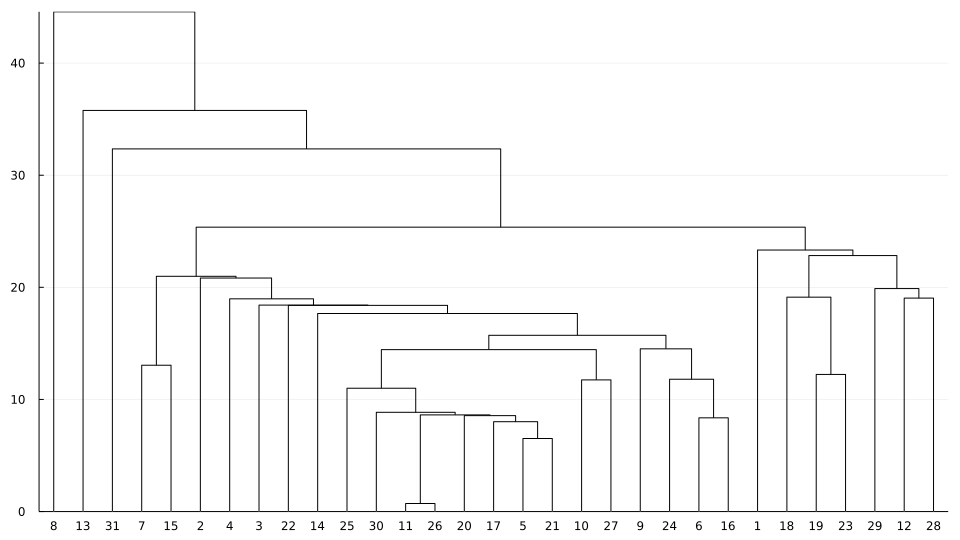

In [64]:
hc10 = hierarchical_clustering(reconstructed, 30, pos, labels)
plot(hc10, size = (1920/2, 1080/2))

In [65]:
plots_db = []
ref = Plots.plot(data["target.cif"], label = "referencia")
ylabel!(L"\textrm{Transmitancia}")
xlabel!(L"\textrm{Nro de onda} (cm^-1)")
for label in labels[idx10masparecidos]
    x,y = data[label]
    pi = plot(ref)
    title!(label)
    push!(plots_db,plot!(pi,x,y./100, legend = false))
end
plot(plots_db..., size = (8000,3000))
savefig("to2.png")

In [66]:
mtch = labels[idx10masparecidos] .|> x -> x[begin:end-4]

10-element Vector{String}:
 "REXFIL_freeONLY"
 "FUVDEH10_freeONLY"
 "KISVEO_freeONLY"
 "IFEPUG07_freeONLY"
 "CIFMAH_freeONLY"
 "JEYXOB_freeONLY"
 "XUYDIF_freeONLY"
 "KONFIE_freeONLY"
 "QEZZEC_freeONLY"
 "OFEZIJ_freeONLY"

In [67]:
diezmasparecidos = filter(:filename => filename -> filename ∈ mtch , df_fsr)
CSV.write("10masparecidos.csv", diezmasparecidos)

"10masparecidos.csv"

In [68]:
same_cluster = filter(:cluster_assignment =>  x -> x == 4, df_fsr)
CSV.write("same_cluster.csv", same_cluster)

"same_cluster.csv"